# Geophysics 3 Group Project
## Flow over hills

$$
z_{ij}=\frac{100}{1 + (r_{ij}/50)^2}
$$
with $r_{ij} = |i|$ for a ridge or $r_{ij} = \sqrt{i^2 + j^2}$ for a hill (-256 $<i,j<$ 255).

Run the next cell to set parameters for the linear wind model:

In [1]:
# Parameters
topo_file = 'NorthBerwickLawBlend(1).txt'       # Topography file name
dx = 25                     # Grid spacing (m)
L  = 500.                   # Horizontal length scale (m)
z0 = 0.01                    # Surface roughness length (m)
zu = 2.                      # Wind measurement height (m)

Run the next cell for a simulation with 1 m s$^{-1}$ wind from the west:

In [2]:
"""
Linear model for turbulent flow over low hills derived
from Jackson and Hunt (1975), Mason and Sykes (1979)
"""
import numpy as np
from scipy.fftpack import fft2,fftshift,ifft2,ifftshift
from scipy.special import kv

# Iteration to find the inner region thickness l (m)
l = (z0/8)*(L/z0)**0.9
for i in range(10):
    l = 2*0.16*L/np.log(l/z0)
a = (np.log(L/z0))**2/(np.log(l/z0)*np.log(zu/z0))

# Read the topography file, find size and take a Fourier transform
z = np.loadtxt(topo_file)
n = z.shape[0]
Fz = fft2(z)
Fz = fftshift(Fz)

# Wavenumbers and modified Bessel functions
k = (2*np.pi/(n*dx))*np.arange(-n/2,n/2)       
m = (2*np.pi/(n*dx))*np.arange(-n/2,n/2)
bu = 1 - kv(0,2*np.sqrt(1j*L*k*zu/l))/kv(0,2*np.sqrt(1j*L*k*z0/l))
bv = 1 - kv(0,2*np.sqrt(2*1j*L*k*zu/l))/kv(0,2*np.sqrt(2*1j*L*k*z0/l))
bu[int(n/2)] = 0
bv[int(n/2)] = 0

# Fourier components of u and v
Fu = np.zeros_like(Fz)
Fv = np.zeros_like(Fz)
for i in range(n):
    for j in range(n):
        r = np.sqrt(k[j]**2 + m[i]**2)
        if r != 0:
            Fu[i,j] = a*bu[j]*(k[j]**2/r)*Fz[i,j]
            Fv[i,j] = a*bv[j]*(k[j]*m[i]/r)*Fz[i,j]

# Inverse Fourier transform
Fu = ifftshift(Fu)
Fv = ifftshift(Fv)
u = 1 + np.real(ifft2(Fu))
v = np.real(ifft2(Fv))
wind = np.sqrt(u**2 + v**2)

<ipython-input-2-f9d196dd2928>:24: RuntimeWarning: invalid value encountered in true_divide
  bu = 1 - kv(0,2*np.sqrt(1j*L*k*zu/l))/kv(0,2*np.sqrt(1j*L*k*z0/l))
<ipython-input-2-f9d196dd2928>:25: RuntimeWarning: invalid value encountered in true_divide
  bv = 1 - kv(0,2*np.sqrt(2*1j*L*k*zu/l))/kv(0,2*np.sqrt(2*1j*L*k*z0/l))


Run the next cell for a basic visualization of the wind field:

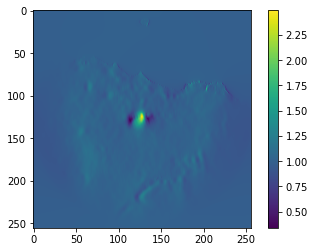

In [3]:
import matplotlib.pyplot as plt
plt.imshow(wind)
plt.colorbar()

Here are some things you could try:

Plot wind speed `wind[256,:]` over the top of the hill and compare it with wind speed over the ridge.

Plot the wind field over the hill as vectors or streamlines.

https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/quiver_simple_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-simple-demo-py

https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/plot_streamplot.html#sphx-glr-gallery-images-contours-and-fields-plot-streamplot-py

Plot the topography as a contour map, a shaded relief map or a surface.

https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

https://matplotlib.org/examples/pylab_examples/shading_example.html

https://matplotlib.org/examples/mplot3d/surface3d_demo.html

In [4]:
u.shape

(256, 256)

Text(0, 0.5, 'Wind speed [ms$^{-1}$]')

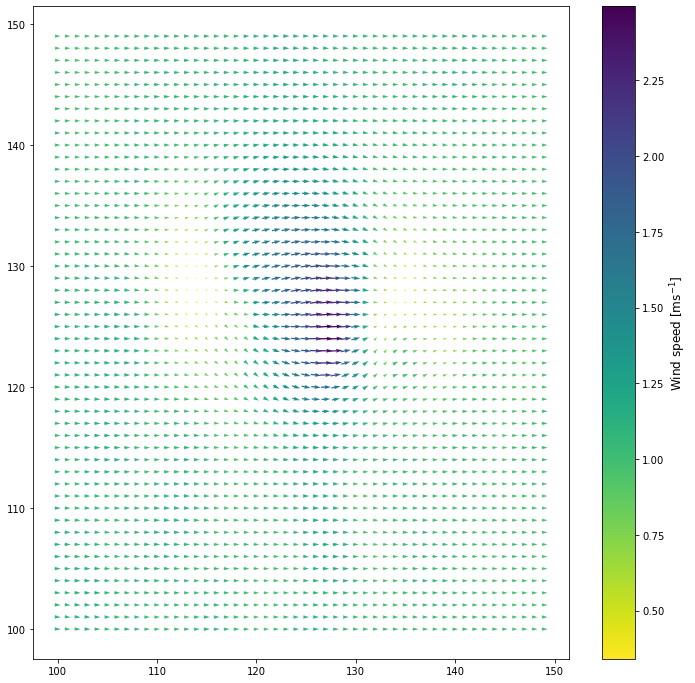

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Wind vector plot over hill

X = np.arange(0, 256)
Y = np.arange(0, 256)

fig, ax = plt.subplots(figsize=(12, 12))
q = ax.quiver(X[100:150], Y[100:150], u[100:150, 100:150], v[100:150, 100:150], wind[100:150, 100:150], cmap='viridis_r', pivot='mid', units='inches')
cbar = fig.colorbar(q)
cbar.ax.set_ylabel('Wind speed [ms$^{-1}$]', fontsize = 12)

# is the wind speed in m/s?

NameError: name 'strm' is not defined

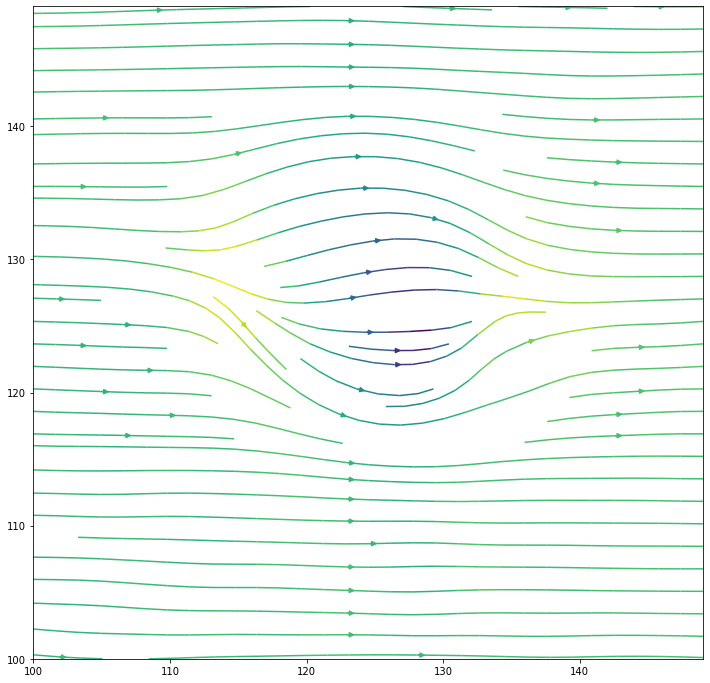

In [6]:
# Wind stream lines over hill

fig, ax = plt.subplots(figsize=(12, 12))
strm = ax.streamplot(X[100:150], Y[100:150], u[100:150, 100:150], v[100:150, 100:150], color=wind[100:150, 100:150], cmap='viridis_r')
cbar = fig.colorbar(strm.lines)
cbar.ax.set_ylabel('Wind speed [ms$^{-1}$]', fontsize = 12)

In [7]:
# Finding the minimum and maximum wind speed
print(wind.min())
print(wind.max())

0.3410954482865712
2.493387764469252


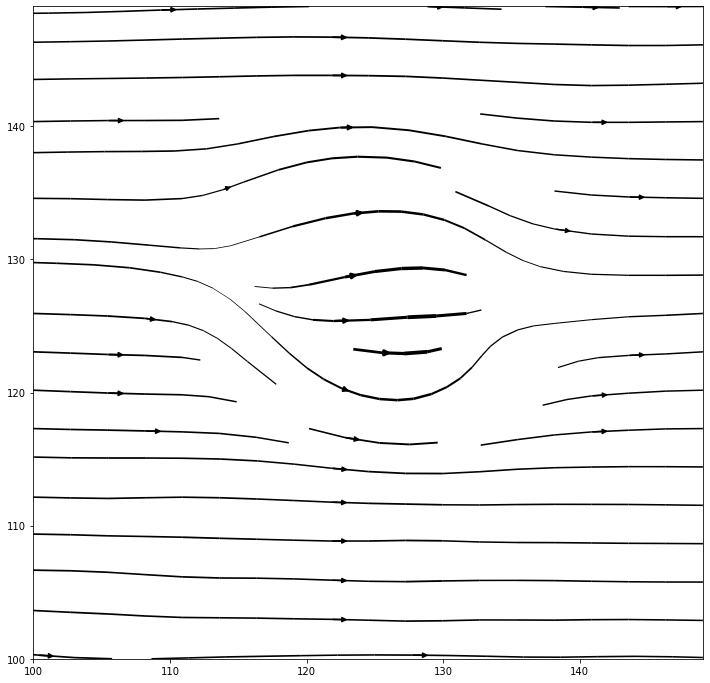

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Vary wind stream linewidth with wind speed

# simple code
X = np.arange(0, 256)
Y = np.arange(0, 256)

fig, ax = plt.subplots(figsize=(12, 12))

lw = 4 * wind[100:150, 100:150] / (wind[100:150, 100:150].max())

ax.streamplot(X[100:150], Y[100:150], u[100:150, 100:150], v[100:150, 100:150], density=0.6, color='k', linewidth=lw)
plt.show()

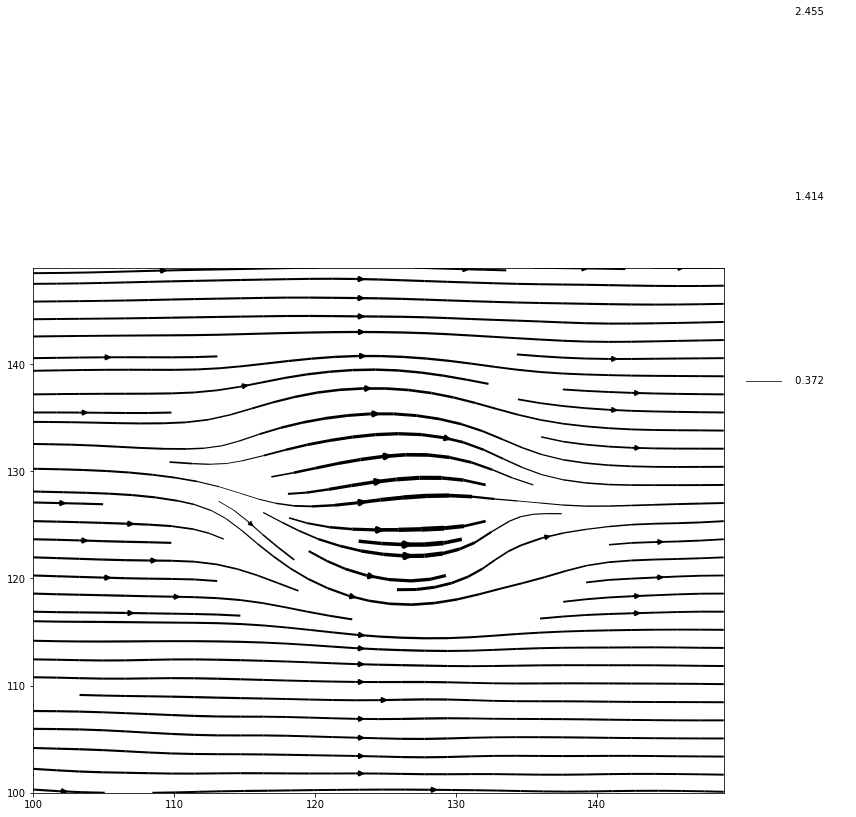

In [9]:
# More sophisticated model for varying stream linewidth with wind speed
import matplotlib.gridspec as gridspec

# Create you figure
fig = plt.figure(figsize=(12, 12))

# Create axes, ax for your plot, and lx for the legend
gs = gridspec.GridSpec(2, 2, height_ratios=(1,2), width_ratios=(6,1))
ax = fig.add_subplot(gs[:, 0])
lx = fig.add_subplot(gs[0, 1])

def windToLW(wind):
    ''' 
    Function to convert windspeed into a sensible linewidth
    This function is somewhat arbitrary and has to be found by trail and error, so that it looks reasonable
    '''
    return wind * 2.

def LWToSpeed(lw):
    ''' The inverse of windToLW, to get the speed back from the linewidth '''
    return (lw) /2

def makeStreamLegend(strm, lx, convertFunc, nlines=5, color='k', fmt='{:g}'):

    ''' Make a legend for a streamplot on a separate axes instance '''

    # Get the linewidths from the streamplot LineCollection
    lws = np.array(strm.lines.get_linewidths())

    # Turn off axes lines and ticks, and set axis limits
    lx.axis('off')
    lx.set_xlim(0, 1)
    lx.set_ylim(0, 1)

    # Loop over the desired number of lines in the legend
    for i, y in enumerate(np.linspace(wind.min(), wind.max(), nlines)):

        # This linewidth
        lw = lws.min()+float(i) * lws.ptp()/float(nlines-1)
        
        # Plot a line in the legend, of the correct length
        lx.axhline(y, 0.1, 0.4, c=color, lw=lw)

        # Add a text label, after converting the lw back to a speed
        lx.text(0.5, y, fmt.format(convertFunc(lw)), va='center')
        
# Make the stream plot
strm = ax.streamplot(X[100:150], Y[100:150], u[100:150, 100:150], v[100:150, 100:150], 
                     color="k", linewidth=windToLW(wind[100:150, 100:150]))

# Add a legend, with nlines lines
makeStreamLegend(strm, lx, LWToSpeed, nlines=3, fmt='{:6.3f}')
plt.tight_layout()

# did not manage to make labels as a tight format

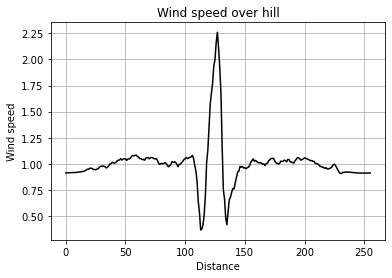

In [10]:
# Wind speed over top of hill
plt.plot(wind[128,:], c = "k")
plt.title("Wind speed over hill")
plt.xlabel("Distance")
plt.ylabel("Wind speed")
plt.grid()

In [11]:
# cut through hill so plot horizontal and vertical wind vectors in the lee of the hill

Text(0.5, 1.0, 'hill')

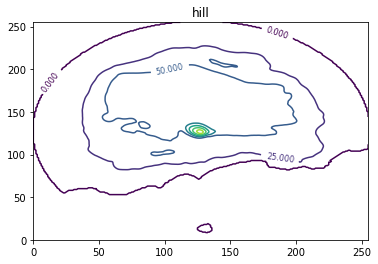

In [15]:
##Topography plot, contours

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

m = np.loadtxt('NorthBerwickLawBlend1.txt')
fig, ax = plt.subplots()
CS = ax.contour(m)
ax.clabel(CS, inline=1, fontsize=8)
ax.set_title('hill')

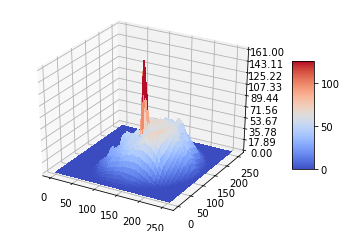

In [16]:
#3d surface

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
n=len(m)
X = np.arange(0, n, 1)
Y = np.arange(0, n, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
B = m[X,Y]

# Plot the surface.
surf = ax.plot_surface(X, Y, B, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()